
The Corpus in this code is from Bank of England's monetary policy meetings.. You can easily have access to it
through the website:
http://bit.ly/36Tc39u.

The Corpus includes 209 monetary policy meeting statements from 199706 to 201410. All of the meeting minutes statement describe the Bank of England's monetary policies and background of monetary and economic conditions.

In this assignment, we utilize basic NLP packages in python to do text preprocessing, sentiment analysis. The introduced packages include nltk.

In [3]:
#import the necessary packages
import pandas as pd
from nltk.corpus import stopwords
import os
import re
import matplotlib.pyplot as plt

# Part 1
Firstly, we import the data. Our data is a corpus of Bank of England monetary policy statements in a directory.We can use the os module to list all the files under the default directory.

In [4]:
#Import the data
path="C:/Users/hp pc/Desktop/Imperial/Spring Term/Text Mining for Economics and Finance/"
filename="mpc_minutes.txt"
# files=os.listdir(path)
data=pd.read_table(filename,encoding="utf-8")
data.columns
#pd.Data Frame operator --------------------------
#speech=pd.read_csv(filename)
#print(speech.columns)
#print(speech.shape)
# print(files[0])
print(data[:100])

      year                                            minutes
0   199706    1 Sections I to V of this minute summarise t...
1   199706    The 12-month growth rate of notes and coins ...
2   199706    Broad money, too, decelerated in April: its ...
3   199706       Lending growth continued at around 9% in ...
4   199706       Lending to individuals remained robust in...
5   199706    Gilt yields had fallen sharply since the ann...
6   199706    There were substantial discrepancies, dating...
7   199706    The most recent estimate of GDP growth in 19...
8   199706       Consumer spending had been growing at an ...
9   199706    The small rise in total stocks in Q1 was bro...
10  199706    There was as yet no clear downtrend in net e...
11  199706    Comment from the corporate sector suggested ...
12  199706    Indicators of employment and unemployment po...
13  199706    The main news about earnings was the downwar...
14  199706    Average earnings had been growing faster in ...
15  1997

C:\Users\hp pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


The case below shows how the stopwords look like. There could be different lists of stopping words according to the research context. In this case, we download the ones from the nltk.

In [5]:
#Single document preprocessing example
import nltk
# import topicmodels
#Import the necessary NLTK module and sklearn module 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#prepare the stopping words from nltk packge
# nltk.download('stopwords')
#show the stopwords
stop=(stopwords.words('english'))
#Display the first 50 stopping words
print(stop[:50])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


In [6]:
#Self defined function on text preprocessing
def mypreprocess(text):
    #text is a document of a corpus
    #lowercase of text
    text=text.lower()
    #remove all the irrelevant numbers and punctuation
    text=re.sub(r'[^a-z]+',' ',text)
    #tokenize the words
    token1=word_tokenize(text)
    #remove the meaningless stopping words
    token2=[t for t in token1 if t not in stopwords.words('english')]
    #stemming transformation
    Porter=1
    if Porter==1:
        token3=[porter.stem(t) for t in token2]
    else:
        token3=[lancaster.stem(t) for t in token2]
    return token3

In [8]:
porter = PorterStemmer()
lancaster=LancasterStemmer()
Token=[]
minute_list=[]

In [9]:
# import topicmodels
da=data.groupby('year',as_index=False).sum()
print(da.index)
for index in da.index:
    # print("111")
    
    minutes_raw=da.loc[[index]].minutes.tolist()
    text=' '.join(minutes_raw)
    token3=mypreprocess(text)
    Token.append(token3)
    new_text=' '.join(token3)
    minute_list.append(new_text)

#Show part of the corpus
print(minute_list[:100])

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            199, 200, 201, 202, 203, 204, 205, 206, 207, 208],
           dtype='int64', length=209)
['section v minut summaris analysi present mpc bank staff bank region agent incorpor also inform becam avail committe present prior june meet monetari condit month growth rate note coin fallen back sinc januari fallen april provision estim may yet clear whether fall simpli reflect deceler demand cash follow recent fall retail price inflat whether implic futur spend broad money deceler april month growth rate fell back februari march went april retail fell wholesal deceler perhap partli month public financ stronger expect individu hold acceler modestli year month growth rate april decemb last monthli data follow quarter q icc hold grew annualis trend growth real remain around continu indic strong futur real demand growth lend growth continu around april borrow icc deceler q pick april unus credit facil mainli i

In [10]:
#transform yearlist
import numpy as np
y1=np.array(da['year'])
y2=y1.tolist()
year_list = [str(x) for x in y2]
print(year_list)



['199706', '199707', '199708', '199709', '199710', '199711', '199712', '199801', '199802', '199803', '199804', '199805', '199806', '199807', '199808', '199809', '199810', '199811', '199812', '199901', '199902', '199903', '199904', '199905', '199906', '199907', '199908', '199909', '199910', '199911', '199912', '200001', '200002', '200003', '200004', '200005', '200006', '200007', '200008', '200009', '200010', '200011', '200012', '200101', '200102', '200103', '200104', '200105', '200106', '200107', '200108', '200109', '200110', '200111', '200112', '200201', '200202', '200203', '200204', '200205', '200206', '200207', '200208', '200209', '200210', '200211', '200212', '200301', '200302', '200303', '200304', '200305', '200306', '200307', '200308', '200309', '200310', '200311', '200312', '200401', '200402', '200403', '200404', '200405', '200406', '200407', '200408', '200409', '200410', '200411', '200412', '200501', '200502', '200503', '200504', '200505', '200506', '200507', '200508', '200509',

In [12]:
final=pd.DataFrame({'Date':year_list,'Transformed Text':minute_list})
print(final)
print(minute_list)

       Date                                   Transformed Text
0    199706  section v minut summaris analysi present mpc b...
1    199707  section minut summaris analysi present mpc ban...
2    199708  section minut summaris analysi present mpc ban...
3    199709  meet took place background earlier present ban...
4    199710  inut mpc meet octob meet preced present bank s...
5    199711  meet preced present bank staff recent data mon...
6    199712  inut mpc meet decemb meet preced present bank ...
7    199801  meet preced present bank staff recent data mon...
8    199802  meet preced present bank staff recent data mon...
9    199803  committe discuss implic slowdown broad monetar...
10   199804  minut mpc meet april committe discuss recent d...
11   199805  minut mpc meet may committe discuss monetari d...
12   199806  inut mpc meet june start meet th june committe...
13   199807  committe discuss recent develop particular emp...
14   199808  review recent news cours finalis august in

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Generate the corpus document-term matrix for textual analysis.We vectorize the corpus by the raw count of the preprocessed text,and  CountVectorizer is to set up the properties of the vectorization fit_transform is to transform the data.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
tf=CountVectorizer(min_df=0.1,stop_words=stopwords.words('english'))
tf1=tf.fit_transform(minute_list)

In [15]:
#Display the main attributes of the Vectorized corpus
print(tf1.shape);
print(list(tf.get_feature_names())[0:20]) 
print(list(tf.stop_words_)[0:20])

(209, 1567)
['abat', 'abil', 'abl', 'abroad', 'abrupt', 'absenc', 'absorb', 'abstract', 'acceler', 'accept', 'access', 'accommod', 'accompani', 'accord', 'account', 'accumul', 'achel', 'achiev', 'acquisit', 'across']
['check', 'raction', 'aerospac', 'went', 'pull', 'numer', 'clarifi', 'indigen', 'readili', 'eport', 'mfr', 'bureaucraci', 'trillion', 'rundown', 'syria', 'ation', 'subset', 'drought', 'fruit', 'washington']


The same process for tfidf transformation.

In [16]:
tfidf=TfidfVectorizer(min_df=0.1,max_df=0.9,stop_words=stopwords.words('english'))
tfidf1=tfidf.fit_transform(minute_list)

In [17]:
tfidf=TfidfVectorizer(min_df=0.1,max_df=0.9,stop_words=stopwords.words('english'))
tfidf1=tfidf.fit_transform(minute_list)
print(tfidf1.shape);
print(list(tfidf.get_feature_names())[0:20]) 
print(list(tfidf.stop_words_)[0:20])

(209, 1375)
['abat', 'abil', 'abl', 'abroad', 'abrupt', 'absenc', 'absorb', 'abstract', 'acceler', 'accept', 'access', 'accommod', 'accompani', 'accord', 'accumul', 'achel', 'achiev', 'acquisit', 'across', 'act']
['check', 'raction', 'aerospac', 'went', 'pull', 'numer', 'clarifi', 'indigen', 'readili', 'eport', 'mfr', 'bureaucraci', 'trillion', 'rundown', 'syria', 'ation', 'subset', 'drought', 'fruit', 'washington']


Once we finish the vectorization, we can check the Document-Term matrix, and then visualize the result in the barplot. 

In [18]:
#document term matrix
print(tf1.toarray()) 
print(tfidf1.toarray())

[[ 0  0  0 ...  7  0  0]
 [ 0  0  1 ... 10  0  0]
 [ 1  1  1 ...  6  0  1]
 ...
 [ 0  1  1 ...  3  0  0]
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  2  1  0]]
[[0.         0.         0.         ... 0.05501548 0.         0.        ]
 [0.         0.         0.01485172 ... 0.02595488 0.         0.        ]
 [0.02210265 0.01706527 0.01434036 ... 0.         0.         0.01472761]
 ...
 [0.         0.02395336 0.02012858 ... 0.01172558 0.         0.        ]
 [0.         0.         0.         ... 0.0497095  0.         0.        ]
 [0.         0.         0.         ... 0.01256088 0.02675595 0.        ]]


# Most Common Words are as follows:

In [19]:
# generate a dataframe to show all the results(use the TF transformation)
dic=tf.get_feature_names()
count=[]
name=[]
print(len(dic))
for indx in range(len(dic)):
    # print("333")
    x=(tf1.toarray())[1,].tolist()
    shape1=tf1.toarray().shape[0]
    name.append(dic[indx])
    count.append(sum([tf1.toarray()[i,indx] for i in range(shape1)]))
Count=pd.DataFrame.from_dict({'Term':name,'Count':count})
print(Count.sort_values(by=['Count'],ascending=False))

1567
          Term  Count
636     growth  11185
1116      rate  10973
714     inflat   8895
1066     price   8723
891      month   7761
702    increas   6320
532     fallen   5673
847     market   5587
507     expect   5251
1561      year   5243
1560     would   5021
1202     risen   4586
250   committe   4531
1381    survey   4249
1161    remain   3967
1031     point   3946
123       bank   3932
972     output   3873
531       fall   3712
1201      rise   3470
1232    sector   3291
294    continu   3213
1403      term   3206
1169    report   3168
361     demand   3167
336       data   3032
876      might   2852
1280      sinc   2812
56        also   2764
432    economi   2701
...        ...    ...
1375  supplier     25
92       artin     25
529     failur     25
9       accept     25
610     gentli     25
1231   section     25
528       fail     25
1404  tertiari     25
1124    realis     25
956       ongo     25
461      enter     25
711      induc     25
115      award     25
52   

# Words with the highest tf-idf score are as follows:

In [109]:
#2. generate dataframe for TFIDF transformation
dic=tfidf.get_feature_names()
count=[]
name=[]
for indx in range(len(dic)):
    x=(tfidf1.toarray())[1,].tolist()
    shape1=tfidf1.toarray().shape[0]
    name.append(dic[indx])
    count.append(sum([tfidf1.toarray()[i,indx] for i in range(shape1)]))
Counttfidf=pd.DataFrame.from_dict({'Term':name,'Count':count})
print(Counttfidf.sort_values(by=['Count'],ascending=False))

            Term      Count
757          may  20.224033
98        august  18.962756
486     februari  18.437836
827       novemb  17.554464
67        annual  15.438139
682         juli  15.078944
672      januari  14.954018
79         april  14.499211
89         asset  14.142841
833        octob  14.140787
685         june  14.120861
1091     septemb  13.633000
745        march  13.607911
316       decemb  12.748657
888    percentag  12.002739
287          cpi  11.437883
1305          us  11.374942
764       medium  10.466766
999     recoveri  10.028799
236       compar   9.855298
1277     unchang   9.849997
1328        wage   9.458419
500         firm   8.837491
175        capac   8.794434
1271       twelv   8.726654
1081        seem   8.695273
635     industri   8.637299
517     forecast   8.602593
556       global   8.581896
139      billion   8.467858
...          ...        ...
659        intra   0.604427
1171       steep   0.604357
1279  underestim   0.603704
1163       stand   0

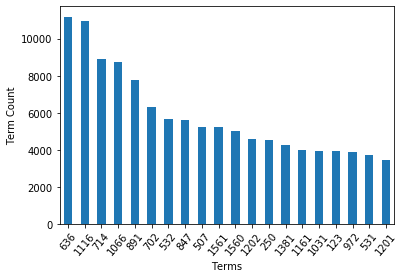

          Term  Count
636     growth  11185
1116      rate  10973
714     inflat   8895
1066     price   8723
891      month   7761
702    increas   6320
532     fallen   5673
847     market   5587
507     expect   5251
1561      year   5243
1560     would   5021
1202     risen   4586
250   committe   4531
1381    survey   4249
1161    remain   3967
1031     point   3946
123       bank   3932
972     output   3873
531       fall   3712
1201      rise   3470


In [20]:
# draw the barplot
topn=20
new=Count.sort_values(by=['Count'],ascending=False).iloc[range(topn),:]
new['Count'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Terms")
plt.ylabel("Term Count")
plt.show()
print(new)



# Part 2

We have used the Loughran and McDonald dictionary as it is better than the Harvard IV-4 dictionary in describing the negative content in financial context. The pessimism dictionaries were developed by social psychologists and not by people who have much knowledge about economics and finance. So, Loughran and McDonald visited this problem and pointed out that there are some words in these negative dictionaries that don't seem that they belong there. Words like 'vice' (meaning some kind of immoral behaviour), but in financial context, we seem to be talking about the vice-president of the company, etc, and words like 'tax' (meaning something that is struggling) are used in more general sense in finance, like the amount of tax the company paid in the last year.
Therefore, there are some words in pessimism dictionaries that look that they don't belong in these dictionaries. So, for this reason we think that Loughran and McDonald dictionary is the most suitable for our application to analyse the Bank of England monetary policy meetings and the UK GDP.


Dictionary 1:

In [22]:
####################################################################################
#run the sentimental analysis with different dictionary , specify the dictionary in use
#1. Import the dictionary LM
from datetime import date
negative=pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',\
                        sheet_name="Negative")
positive=pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',\
                        sheet_name="Positive")
strmodal=pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',\
                        sheet_name="StrongModal")
weakmodal=pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',\
                        sheet_name="WeakModal")


# Question 3
Quantitative representation of each address using a simple count-based measure.

In [23]:
#2. preprocess the dictionary
p_words=positive['Positive'].tolist()
p_list=[]
for p in p_words:
    p_list.append(porter.stem(p.strip()).lower())
p_list=list(set(p_list))

n_words=negative['Negative'].tolist();
n_list=[]
for n in n_words:
    n_list.append(porter.stem(n.strip().lower()))
n_list=list(set(n_list))


In [57]:
#3. generate the dataframe of sentiment
score1=[]
score2=[]
for file in minute_list:
    tokens=file.split(' ')
    pos=[word for word in tokens if word in p_list]
    neg=[word for word in tokens if word in n_list]
    score1.append((len(pos)-len(neg)))

sentiment_Frame=pd.DataFrame({'Date':year_list,'Score1':score1})
print(sentiment_Frame)

       Date  Score1
0    199706       5
1    199707       3
2    199708     -33
3    199709     -29
4    199710     -17
5    199711     -54
6    199712     -89
7    199801     -61
8    199802     -99
9    199803     -71
10   199804     -76
11   199805     -81
12   199806    -112
13   199807    -114
14   199808    -141
15   199809    -151
16   199810    -153
17   199811    -174
18   199812    -153
19   199901     -96
20   199902     -89
21   199903     -68
22   199904     -67
23   199905     -19
24   199906     -10
25   199907     -13
26   199908     -44
27   199909      -7
28   199910      13
29   199911     -41
..      ...     ...
179  201205     -77
180  201206     -63
181  201207     -54
182  201208     -66
183  201209     -34
184  201210     -33
185  201211     -37
186  201212     -15
187  201301     -36
188  201302     -36
189  201303     -50
190  201304     -40
191  201305     -44
192  201306     -47
193  201307     -32
194  201308     -41
195  201309     -29
196  201310     -11


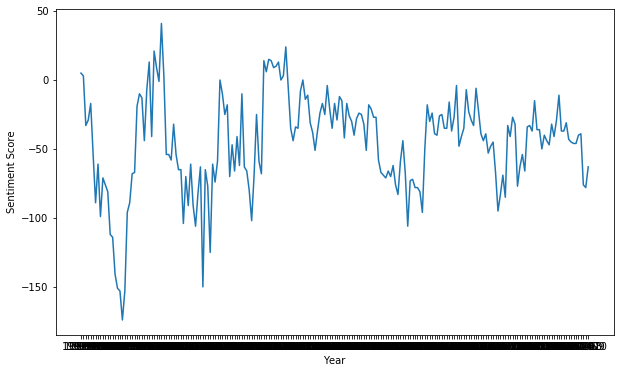

In [108]:

yl1=year_list
yl2=score1
plt.plot(yl1,yl2,label='Quantitative presentation') #sentiment score
plt.ylabel("Sentiment Score")
plt.xlabel("Year")
plt.show()


# Part 4
We have used two different external time series to correlate with our quantitative representation:
1. UK population from 1922-2016
2. UK GDP from 1997-2019


In [58]:
from sklearn import preprocessing
import datetime

newdate=[]
for i in range(len(year_list)):
    a=datetime.datetime.strptime(year_list[i], "%Y%m").strftime("%Y") 
    newdate.append(a)
form0=pd.DataFrame({'Date':newdate,'Transformed Text':minute_list})
form1=form0.groupby('Date',as_index=False).sum()
print(form1)
newyear_list=form1['Date'].tolist();
newminute_list=form1['Transformed Text'].tolist();




    Date                                   Transformed Text
0   1997  section v minut summaris analysi present mpc b...
1   1998  meet preced present bank staff recent data mon...
2   1999  turn immedi polici decis committe discuss pros...
3   2000  minut mpc meet januari turn immedi polici deci...
4   2001  turn immedi polici decis committe discuss worl...
5   2002  turn immedi polici decis committe discuss worl...
6   2003  turn immedi polici decis committe discuss worl...
7   2004  turn immedi polici decis committe discuss fina...
8   2005  minut mpc meet held januari turn immedi polici...
9   2006  turn immedi polici decis committe discuss deve...
10  2007  turn immedi polici decis committe discuss deve...
11  2008  turn immedi polici decis committe discuss fina...
12  2009  turn immedi polici decis committe discuss deve...
13  2010  turn immedi polici decis committe discuss fina...
14  2011  turn immedi polici decis committe discuss fina...
15  2012  turn immedi polici decis commi

External resource :The dataset contains a broad set of macroeconomic and financial data for the UK stretching back in some cases to the C13th and with one or two benchmark estimates available for 1086, the year of the Domesday Book. The dataset was originally called the 'Three centuries of macroeconomic data' spreadsheet but has now been renamed given its broader coverage. Version 3 of the dataset has now been updated to 2016. It's avaiable from: https://www.kaggle.com/bank-of-england/a-millennium-of-macroeconomic-data/data . We use the population of UK in this file.

# 1：UK's Population from 1922-2016.

In [59]:
import xlrd

d1=xlrd.open_workbook('millenniumofdata_v3_final.xlsx')
sheet=d1.sheets()[22] 
col0=sheet.col_values(0) #read the year of sheet
col1=sheet.col_values(3) #read the data of population in United Kingdom of Great Britain and N.Ireland(Political Area) between 1922 and 2016

col=list(filter(None,col1))
list0=col[2:]
popu_list=[str(x) for x in list0]

list1=[int(x) for x in (col0[247:])]
year_list1=[str(x) for x in list1]


df1=pd.DataFrame({'Date':year_list1,'Population in UK':popu_list})
print(df1)



    Date    Population in UK
0   1922             44393.5
1   1923             44628.1
2   1924             44934.6
3   1925             45085.0
4   1926             45264.6
5   1927             45429.0
6   1928             45626.2
7   1929             45730.0
8   1930             45890.9
9   1931             46073.6
10  1932             46335.0
11  1933             46520.0
12  1934             46666.0
13  1935             46868.5
14  1936             47081.3
15  1937             47288.6
16  1938             47494.1
17  1939             47761.7
18  1940             48226.0
19  1941             48216.0
20  1942             48400.0
21  1943             48789.0
22  1944             49016.0
23  1945             49182.0
24  1946             49217.0
25  1947             49538.7
26  1948             50033.2
27  1949             50331.0
28  1950             50571.5
29  1951             50301.9
..   ...                 ...
65  1987           56804.004
66  1988           56916.408
67  1989  5707

In [60]:
score5=[]
score6=[]
for file in newminute_list:
    tokens=file.split(' ')
    pos=[word for word in tokens if word in p_list]
    neg=[word for word in tokens if word in n_list]
    score5.append((len(pos)-len(neg)))
    # score6.append(((len(pos)-len(neg))/len(tokens)))

sentiment_Frame1=pd.DataFrame({'Date':newyear_list,'Score1':score5})
print(sentiment_Frame1)

    Date  Score1
0   1997    -214
1   1998   -1385
2   1999    -420
3   2000    -432
4   2001   -1042
5   2002    -482
6   2003    -483
7   2004    -103
8   2005    -273
9   2006    -315
10  2007    -532
11  2008    -869
12  2009    -499
13  2010    -306
14  2011    -689
15  2012    -512
16  2013    -440
17  2014    -507


In [61]:
df2=pd.merge(df1,sentiment_Frame1,on='Date')
print(df2)

    Date    Population in UK  Score1
0   1997           58314.288    -214
1   1998           58474.974   -1385
2   1999  58684.420999999995    -420
3   2000           58886.021    -432
4   2001           59112.978   -1042
5   2002           59365.643    -482
6   2003           59636.638    -483
7   2004           59950.322    -103
8   2005  60413.242999999995    -273
9   2006           60827.054    -315
10  2007           61319.092    -532
11  2008            61823.82    -869
12  2009           62260.453    -499
13  2010           62759.423    -306
14  2011   63285.12700000001    -689
15  2012           63704.996    -512
16  2013   64105.62899999999    -440
17  2014           64596.754    -507


One thing to compare the trends is that the scale of the data could be completely different. To describle the trends, it's better to rescale the series

In [64]:
df=df2[['Population in UK','Score1']]
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
score=list(scaled_df[:,1])
ret=list(scaled_df[:,0])
scaled_df = pd.DataFrame({'Date':newyear_list,'Score':score,'Population':ret})
print(scaled_df)


    Date     Score  Population
0   1997  1.048404   -1.315384
1   1998 -2.862099   -1.235897
2   1999  0.360476   -1.132289
3   2000  0.320402   -1.032563
4   2001 -1.716666   -0.920293
5   2002  0.153429   -0.795306
6   2003  0.150090   -0.661252
7   2004  1.419083   -0.506081
8   2005  0.851376   -0.277086
9   2006  0.711119   -0.072385
10  2007 -0.013543    0.171014
11  2008 -1.138940    0.420689
12  2009  0.096659    0.636680
13  2010  0.741174    0.883508
14  2011 -0.537838    1.143560
15  2012  0.053246    1.351258
16  2013  0.293687    1.549441
17  2014  0.069943    1.792387


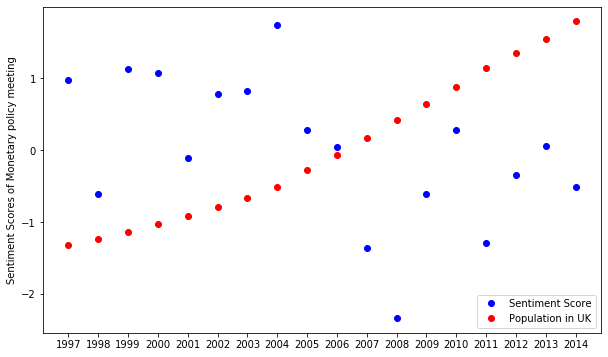

The correlation is -0.5056023059611403


In [101]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 6]
x1=scaled_df['Date'].tolist()
y1=scaled_df['Score'].tolist()
y2=scaled_df['Population'].tolist()
plt.plot(x1,y1,'bo',label='Sentiment Score') #sentiment score
plt.plot(x1,y2,'ro',label='Population in UK') #Population in UK
plt.ylabel('Sentiment Scores of Monetary policy meeting')
lgnd = plt.legend(loc="lower right", numpoints=1, fontsize=10)
plt.show()
corr = np.corrcoef(scaled_df['Population'].tolist(), scaled_df['Score'].tolist())
print('The correlation is', corr[1][0])

In [94]:
from statsmodels.formula.api import ols
import pandas as pd
data=pd.DataFrame({'x':y2,'y':y1})
model=ols('y~x',data).fit()
model.summary()

C:\Users\hp pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     6.407
Date:                Thu, 23 Jan 2020   Prob (F-statistic):             0.0222
Time:                        17:48:41   Log-Likelihood:                -22.510
No. Observations:                  18   AIC:                             49.02
Df Residuals:                      16   BIC:                             50.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-17      0.211  -3.28e-16      1.000      -0.448       0.448
x             -0.5347      0.211     -2.531      0.022      -0.983      -0.087
==============================================================================
Omnibus:                        2.158   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                1.181
Skew:                          -0.627   Prob(JB):                        0.554
Kurtosis:                       3.019   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **The correlation between our representation and the UK population is 0.505 which shows that they are negatively co-related. As the Bank of England Monetary policy should not have any impact on the population, the sign is correct as per our analysis. The t-stat is -2.531. Therefore, it is statistically significant.**

# 2.UK GDP from the year 1997-2019.

Data for the UK GDP was downloaded from www.fred.stlouisfed.org/series/UKNGDP and was analysed as follows:

In [66]:
import pandas as pd

d1=pd.read_csv('UKNGDP.csv')
path1='UKNGDP.csv'
gdp_t=pd.read_csv('UKNGDP.csv')
gdp = gdp_t[10:]
gdp.columns = ['year','gdp_value'] 
print(gdp)

           year gdp_value
10   1997-01-01    234506
11   1997-04-01    235902
12   1997-07-01    242496
13   1997-10-01    239382
14   1998-01-01    243519
15   1998-04-01    246602
16   1998-07-01    249656
17   1998-10-01    256598
18   1999-01-01    257975
19   1999-04-01    256407
20   1999-07-01    260330
21   1999-10-01    265180
22   2000-01-01    270402
23   2000-04-01    273120
24   2000-07-01    275582
25   2000-10-01    276548
26   2001-01-01    279366
27   2001-04-01    285427
28   2001-07-01    286136
29   2001-10-01    288549
30   2002-01-01    291600
31   2002-04-01    295393
32   2002-07-01    299708
33   2002-10-01    303900
34   2003-01-01    307956
35   2003-04-01    311416
36   2003-07-01    316502
37   2003-10-01    321601
38   2004-01-01    323917
39   2004-04-01    329612
..          ...       ...
71   2012-04-01    423374
72   2012-07-01    432821
73   2012-10-01    434623
74   2013-01-01    437338
75   2013-04-01    441128
76   2013-07-01    449508
77   2013-10

In [67]:
path1='UKNGDP.csv'
gdp_t=pd.read_csv(path1)
import numpy as np
gdp = gdp_t[10:]
gdp.columns = ['year','gdp_value'] 

da1=gdp.groupby('year',as_index=False).sum()
year_list1=gdp['year'].tolist()
gdp_value1=gdp['gdp_value'].tolist()


newdate1=[]
for i in range(len(year_list1)):
    a=datetime.datetime.strptime(str(year_list1[i])[0:10], "%Y-%m-%d").strftime("%Y") 
    newdate1.append(a)
    
gdp_list=[int(i) for i in gdp_value1]

form0=pd.DataFrame({'Date':newdate1,'GDP':gdp_list})
form1=form0.groupby('Date',as_index=False).sum()[0:18]
print(form1)
newminute_list2=form1['GDP'].tolist();
newyear_list1=form1['Date'].tolist();
#print(form1)
#newyear_list=form1['Date'].tolist();
#newminute_list=form1['newyear_list1Transformed Text'].tolist();


    Date      GDP
0   1997   952286
1   1998   996375
2   1999  1039892
3   2000  1095652
4   2001  1139478
5   2002  1190601
6   2003  1257475
7   2004  1320128
8   2005  1396274
9   2006  1474923
10  2007  1549820
11  2008  1589931
12  2009  1547562
13  2010  1601925
14  2011  1659785
15  2012  1712320
16  2013  1782109
17  2014  1861965


In [79]:
score7=[]
score8=[]
for file in newminute_list:
    
    tokens=file.split(' ')
    pos=[word for word in tokens if word in p_list]
    neg=[word for word in tokens if word in n_list]
    score7.append((len(pos)-len(neg)))
    #score8.append(((len(pos)-len(neg))/len(tokens)))
#print(len(newyear_list1))
#print(len(score7))
#print(len(score8))
    
sentiment_Frame2=pd.DataFrame({'Date':newyear_list1,'Score1':score7})
print(sentiment_Frame2)

    Date  Score1
0   1997    -214
1   1998   -1385
2   1999    -420
3   2000    -432
4   2001   -1042
5   2002    -482
6   2003    -483
7   2004    -103
8   2005    -273
9   2006    -315
10  2007    -532
11  2008    -869
12  2009    -499
13  2010    -306
14  2011    -689
15  2012    -512
16  2013    -440
17  2014    -507


In [80]:
df3=pd.merge(form1,sentiment_Frame2,on='Date')
print(df3)

    Date      GDP  Score1
0   1997   952286    -214
1   1998   996375   -1385
2   1999  1039892    -420
3   2000  1095652    -432
4   2001  1139478   -1042
5   2002  1190601    -482
6   2003  1257475    -483
7   2004  1320128    -103
8   2005  1396274    -273
9   2006  1474923    -315
10  2007  1549820    -532
11  2008  1589931    -869
12  2009  1547562    -499
13  2010  1601925    -306
14  2011  1659785    -689
15  2012  1712320    -512
16  2013  1782109    -440
17  2014  1861965    -507


In [81]:
df=df3[['GDP','Score1']]
scaler = preprocessing.StandardScaler()
scaled_df2 = scaler.fit_transform(df)
score=list(scaled_df2[:,1])
ret=list(scaled_df2[:,0])
scaled_df2 = pd.DataFrame({'Date':newyear_list,'Score':score,'GDP':ret})
print(scaled_df2)

    Date     Score       GDP
0   1997  1.048404 -1.613459
1   1998 -2.862099 -1.453949
2   1999  0.360476 -1.296508
3   2000  0.320402 -1.094773
4   2001 -1.716666 -0.936215
5   2002  0.153429 -0.751256
6   2003  0.150090 -0.509312
7   2004  1.419083 -0.282639
8   2005  0.851376 -0.007149
9   2006  0.711119  0.277396
10  2007 -0.013543  0.548367
11  2008 -1.138940  0.693485
12  2009  0.096659  0.540197
13  2010  0.741174  0.736878
14  2011 -0.537838  0.946210
15  2012  0.053246  1.136277
16  2013  0.293687  1.388768
17  2014  0.069943  1.677680


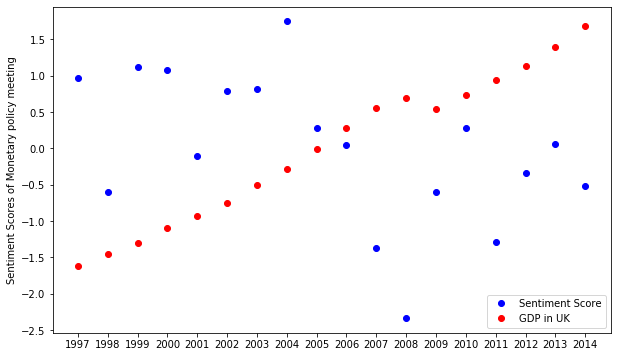

The correlation is -0.5347299535968696


In [110]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 6]
x1=scaled_df2['Date'].tolist()
y3=scaled_df2['Score'].tolist()
y4=scaled_df2['GDP'].tolist()
plt.plot(x1,y3,'bo',label='Sentiment Score') #sentiment score
plt.plot(x1,y4,'ro',label='GDP in UK') #Population in UK
plt.ylabel('Sentiment Scores of Monetary policy meeting')
lgnd = plt.legend(loc="lower right", numpoints=1, fontsize=10)
plt.show()
corr = np.corrcoef(scaled_df2['GDP'].tolist(), scaled_df2['Score'].tolist())
print('The correlation is', corr[1][0])

In [97]:
from statsmodels.formula.api import ols
import pandas as pd
data=pd.DataFrame({'x':y4,'y':y3})
model=ols('y~x',data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     6.407
Date:                Thu, 23 Jan 2020   Prob (F-statistic):             0.0222
Time:                        17:51:39   Log-Likelihood:                -22.510
No. Observations:                  18   AIC:                             49.02
Df Residuals:                      16   BIC:                             50.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-17      0.211  -3.28e-16      1.000      -0.448       0.448
x             -0.5347      0.211     -2.531      0.022      -0.983      -0.087
==============================================================================
Omnibus:                        2.158   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                1.181
Skew:                          -0.627   Prob(JB):                        0.554
Kurtosis:                       3.019   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The correlation between our representation and the UK GDP is -0.53 which shows that they have small correlation. The sign is opposite to what we expected. As there should have been a positive relationship between our GDP value and Bank of England Monetary statements, we feel there is some error in the analysis or some variables are missing. 

# Part 5

# 1. For UK Population

In [117]:
score5=[]
score6=[]
for file in newminute_list:
    tokens=file.split(' ')
    pos=[word for word in tokens if word in p_list]
    neg=[word for word in tokens if word in n_list]
    score5.append((len(pos)-len(neg))/(len(pos)+len(neg)))
    score6.append(((len(pos)-len(neg))/len(tokens)))

sentiment_Frame1=pd.DataFrame({'Date':newyear_list,'Score1':score5, 'Score2' : score6})
print(sentiment_Frame1)

    Date    Score1    Score2
0   1997 -0.132099 -0.008992
1   1998 -0.309636 -0.022764
2   1999 -0.114817 -0.007674
3   2000 -0.120133 -0.007848
4   2001 -0.253528 -0.018861
5   2002 -0.153113 -0.009070
6   2003 -0.149120 -0.008657
7   2004 -0.045037 -0.002153
8   2005 -0.210486 -0.011778
9   2006 -0.237020 -0.014153
10  2007 -0.395245 -0.023519
11  2008 -0.504353 -0.035337
12  2009 -0.309745 -0.021846
13  2010 -0.210165 -0.013374
14  2011 -0.387296 -0.026348
15  2012 -0.280394 -0.018802
16  2013 -0.235546 -0.016012
17  2014 -0.299823 -0.020101


In [113]:
df2=pd.merge(df1,sentiment_Frame1,on='Date')
print(df2)

    Date    Population in UK    Score1    Score2
0   1997           58314.288 -0.132099 -0.132099
1   1998           58474.974 -0.309636 -0.309636
2   1999  58684.420999999995 -0.114817 -0.114817
3   2000           58886.021 -0.120133 -0.120133
4   2001           59112.978 -0.253528 -0.253528
5   2002           59365.643 -0.153113 -0.153113
6   2003           59636.638 -0.149120 -0.149120
7   2004           59950.322 -0.045037 -0.045037
8   2005  60413.242999999995 -0.210486 -0.210486
9   2006           60827.054 -0.237020 -0.237020
10  2007           61319.092 -0.395245 -0.395245
11  2008            61823.82 -0.504353 -0.504353
12  2009           62260.453 -0.309745 -0.309745
13  2010           62759.423 -0.210165 -0.210165
14  2011   63285.12700000001 -0.387296 -0.387296
15  2012           63704.996 -0.280394 -0.280394
16  2013   64105.62899999999 -0.235546 -0.235546
17  2014           64596.754 -0.299823 -0.299823


In [114]:
df=df2[['Population in UK','Score1']]
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
score=list(scaled_df[:,1])
ret=list(scaled_df[:,0])
scaled_df = pd.DataFrame({'Date':newyear_list,'Score':score,'Population':ret})
print(scaled_df)

    Date     Score  Population
0   1997  0.972256   -1.315384
1   1998 -0.605080   -1.235897
2   1999  1.125798   -1.132289
3   2000  1.078562   -1.032563
4   2001 -0.106588   -0.920293
5   2002  0.785553   -0.795306
6   2003  0.821029   -0.661252
7   2004  1.745759   -0.506081
8   2005  0.275823   -0.277086
9   2006  0.040075   -0.072385
10  2007 -1.365682    0.171014
11  2008 -2.335055    0.420689
12  2009 -0.606056    0.636680
13  2010  0.278674    0.883508
14  2011 -1.295060    1.143560
15  2012 -0.345284    1.351258
16  2013  0.053173    1.549441
17  2014 -0.517895    1.792387


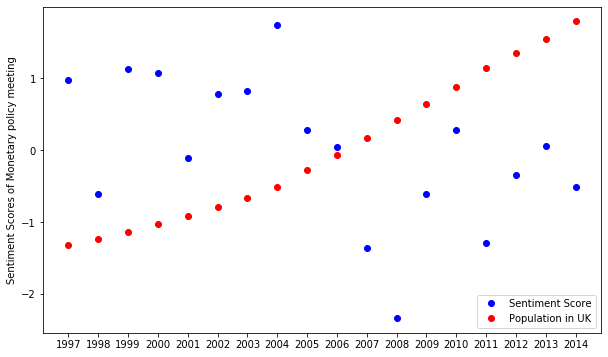

The correlation is -0.5056023059611403


In [115]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 6]
x1=scaled_df['Date'].tolist()
y1=scaled_df['Score'].tolist()
y2=scaled_df['Population'].tolist()
plt.plot(x1,y1,'bo',label='Sentiment Score') #sentiment score
plt.plot(x1,y2,'ro',label='Population in UK') #Population in UK
plt.ylabel('Sentiment Scores of Monetary policy meeting')
lgnd = plt.legend(loc="lower right", numpoints=1, fontsize=10)
plt.show()
corr = np.corrcoef(scaled_df['Population'].tolist(), scaled_df['Score'].tolist())
print('The correlation is', corr[1][0])

The correlation turns out to be -ve with term weighting for our quantitative representation and UK population.

# For UK GDP

In [116]:
score7=[]
score8=[]
for file in newminute_list:
    
    tokens=file.split(' ')
    pos=[word for word in tokens if word in p_list]
    neg=[word for word in tokens if word in n_list]
    score7.append((len(pos)-len(neg))/(len(pos)+len(neg)))
    score8.append(((len(pos)-len(neg))/len(tokens)))
#print(len(newyear_list1))
#print(len(score7))
#print(len(score8))
    
sentiment_Frame2=pd.DataFrame({'Date':newyear_list1,'Score1':score7, 'Score2' : score8})
print(sentiment_Frame2)

    Date    Score1    Score2
0   1997 -0.132099 -0.008992
1   1998 -0.309636 -0.022764
2   1999 -0.114817 -0.007674
3   2000 -0.120133 -0.007848
4   2001 -0.253528 -0.018861
5   2002 -0.153113 -0.009070
6   2003 -0.149120 -0.008657
7   2004 -0.045037 -0.002153
8   2005 -0.210486 -0.011778
9   2006 -0.237020 -0.014153
10  2007 -0.395245 -0.023519
11  2008 -0.504353 -0.035337
12  2009 -0.309745 -0.021846
13  2010 -0.210165 -0.013374
14  2011 -0.387296 -0.026348
15  2012 -0.280394 -0.018802
16  2013 -0.235546 -0.016012
17  2014 -0.299823 -0.020101


In [91]:
df3=pd.merge(form1,sentiment_Frame2,on='Date')
print(df3)

    Date      GDP    Score1    Score2
0   1997   952286 -0.132099 -0.008992
1   1998   996375 -0.309636 -0.022764
2   1999  1039892 -0.114817 -0.007674
3   2000  1095652 -0.120133 -0.007848
4   2001  1139478 -0.253528 -0.018861
5   2002  1190601 -0.153113 -0.009070
6   2003  1257475 -0.149120 -0.008657
7   2004  1320128 -0.045037 -0.002153
8   2005  1396274 -0.210486 -0.011778
9   2006  1474923 -0.237020 -0.014153
10  2007  1549820 -0.395245 -0.023519
11  2008  1589931 -0.504353 -0.035337
12  2009  1547562 -0.309745 -0.021846
13  2010  1601925 -0.210165 -0.013374
14  2011  1659785 -0.387296 -0.026348
15  2012  1712320 -0.280394 -0.018802
16  2013  1782109 -0.235546 -0.016012
17  2014  1861965 -0.299823 -0.020101


In [92]:
df=df3[['GDP','Score1']]
scaler = preprocessing.StandardScaler()
scaled_df2 = scaler.fit_transform(df)
score=list(scaled_df2[:,1])
ret=list(scaled_df2[:,0])
scaled_df2 = pd.DataFrame({'Date':newyear_list,'Score':score,'GDP':ret})
print(scaled_df2)

    Date     Score       GDP
0   1997  0.972256 -1.613459
1   1998 -0.605080 -1.453949
2   1999  1.125798 -1.296508
3   2000  1.078562 -1.094773
4   2001 -0.106588 -0.936215
5   2002  0.785553 -0.751256
6   2003  0.821029 -0.509312
7   2004  1.745759 -0.282639
8   2005  0.275823 -0.007149
9   2006  0.040075  0.277396
10  2007 -1.365682  0.548367
11  2008 -2.335055  0.693485
12  2009 -0.606056  0.540197
13  2010  0.278674  0.736878
14  2011 -1.295060  0.946210
15  2012 -0.345284  1.136277
16  2013  0.053173  1.388768
17  2014 -0.517895  1.677680


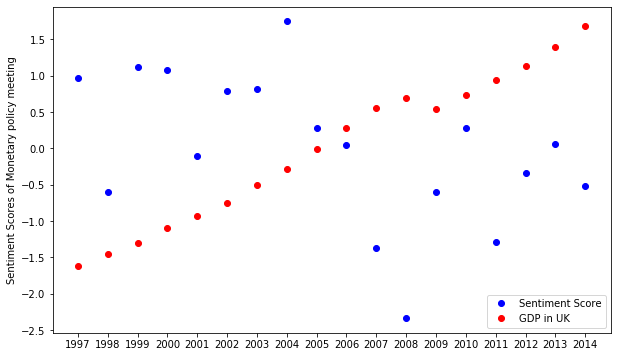

The correlation is -0.5347299535968696


In [93]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 6]
x1=scaled_df2['Date'].tolist()
y1=scaled_df2['Score'].tolist()
y2=scaled_df2['GDP'].tolist()
plt.plot(x1,y1,'bo',label='Sentiment Score') #sentiment score
plt.plot(x1,y2,'ro',label='GDP in UK') #Population in UK
plt.ylabel('Sentiment Scores of Monetary policy meeting')
lgnd = plt.legend(loc="lower right", numpoints=1, fontsize=10)
plt.show()
corr = np.corrcoef(scaled_df2['GDP'].tolist(), scaled_df2['Score'].tolist())
print('The correlation is', corr[1][0])

The correlation between UK GDP and our quantitative representation is -0.53. Therefore, with term weighting there seems to be a negative correlation.

In [102]:
print("DONE!!")

DONE!!
